In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import zarr
import warnings
from mpl_toolkits import mplot3d
warnings.filterwarnings('ignore')
import sys
sys.path.insert(1, '/data/keeling/a/alfonso8/projects/camp2ex_proj/src')
from utils import time_3d

In [ ]:
def rolling_window(a, window):
    """ Create a rolling window object for application of functions
    eg: result=np.ma.std(array, 11), 1). """
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1], )
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


def texture(fld):
    """ Determine a texture field using an 11pt stdev
    texarray=texture(pyradarobj, field). """
    tex = np.ma.zeros(fld.shape)
    for timestep in range(tex.shape[0]):
        ray = np.ma.std(rolling_window(fld[timestep, :], 3), 1)
        tex[timestep, 1:-1] = ray
        tex[timestep, 0:1] = np.ones(1) * ray[0]
        tex[timestep, -2:] = np.ones(2) * ray[-1]
    return tex

In [4]:
ds_xr = xr.open_zarr('/data/keeling/a/alfonso8/gpm/camp2ex/zarr/KUsKAs_Wn/lores.zarr')

# case = ds_xr.sel(time='2019-09-16 03:12:45')
# case = ds_xr.sel(time='2019-09-16 03:13:00')
case = ds_xr.sel(time='2019-09-16 03:12')

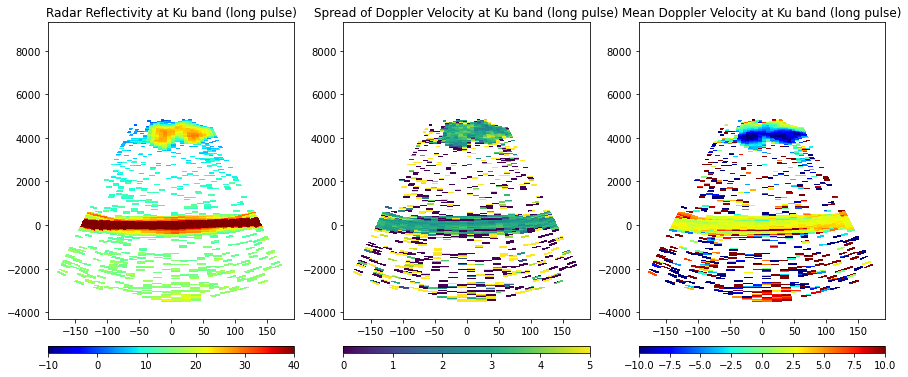

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(10, 15))
case = ds_xr.sel(time='2019-09-16 03:13:00')
x = case.range * np.sin(np.deg2rad(case.azimuth[:, 0]))
y = case.alt3D[:, :, 0] * np.cos(np.deg2rad(case.azimuth[:, 0]))
im1 = ax[0][0].pcolormesh(x, y, case.ldrhh14[:, :, 0])
im2 = ax[0][1].pcolormesh(x, y, case.ldrhh14SP[:, :, 0])
im3 = ax[1][0].pcolormesh(x, y, case.ldrhh35[:, :, 0])
im4 = ax[1][1].pcolormesh(x, y, case.ldrhh35SP[:, :, 0])


In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 15))
case = ds_xr.sel(time='2019-09-16 03:13:00')
x = case.range * np.sin(np.deg2rad(case.azimuth[:, 0]))
y = case.alt3D[:, :, 0] * np.cos(np.deg2rad(case.azimuth[:, 0].values))
im1 = ax[0][0].pcolormesh(x, y, texture(case.ldrhh14[:, :, 0].values))
im2 = ax[0][1].pcolormesh(x, y, texture(case.ldrhh14SP[:, :, 0].values))
im3 = ax[1][0].pcolormesh(x, y, texture(case.ldrhh35[:, :, 0].values))
im4 = ax[1][1].pcolormesh(x, y, texture(case.ldrhh35SP[:, :, 0].values))

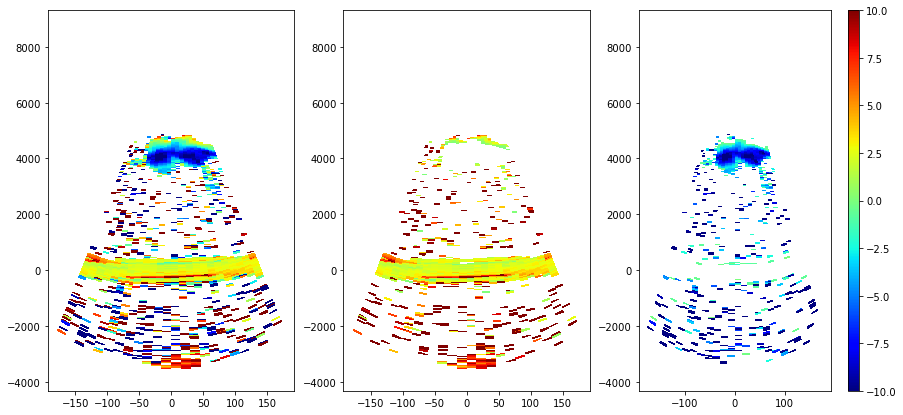

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 7))
x = case.range * np.sin(np.deg2rad(case.azimuth[:, 0]))
y = case.alt3D[:, :, 0] * np.cos(np.deg2rad(case.azimuth[:, 0]))
im2 = ax1.pcolormesh(x, y, case.vel14[:, :, 0], vmin=-10, vmax=10,cmap='jet')
im1 = ax2.pcolormesh(x, y, np.ma.masked_where(case.vel14[:, :, 0] < 0,case.vel14[:, :, 0]),
                     vmin=-10, vmax=10,cmap='jet')
im3 = ax3.pcolormesh(x, y, np.ma.masked_where(case.vel14[:, :, 0] > 0, case.vel14[:, :, 0]),
                     vmin=-10, vmax=10,cmap='jet')
plt.colorbar(im3, ax=ax3, orientation='vertical', aspect=35,  pad=0.07)



In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 15))
case = ds_xr.sel(time='2019-09-16 03:13:00')
x = case.range * np.sin(np.deg2rad(case.azimuth[:, 0]))
y = case.alt3D[:, :, 0] * np.cos(np.deg2rad(case.azimuth[:, 0]))
im1 = ax[0][0].pcolormesh(x, y, case.sig14[:, :, 0])
im2 = ax[0][1].pcolormesh(x, y, case.sig14SP[:, :, 0])
im3 = ax[1][0].pcolormesh(x, y, case.sig35[:, :, 0])
im4 = ax[1][1].pcolormesh(x, y, case.sig35SP[:, :, 0])

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 15))
case = ds_xr.sel(time='2019-09-16 03:13:00')
x = case.range * np.sin(np.deg2rad(case.azimuth[:, 0]))
y = case.alt3D[:, :, 0] * np.cos(np.deg2rad(case.azimuth[:, 0]))
im1 = ax[0][0].pcolormesh(x, y, texture(case.sig14[:, :, 0].values))
im2 = ax[0][1].pcolormesh(x, y, texture(case.sig14SP[:, :, 0].values))
im3 = ax[1][0].pcolormesh(x, y, texture(case.sig35[:, :, 0].values))
im4 = ax[1][1].pcolormesh(x, y, texture(case.sig35SP[:, :, 0].values))

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 15))
case = ds_xr.sel(time='2019-09-16 03:13:00')
x = case.range * np.sin(np.deg2rad(case.azimuth[:, 0]))
y = case.alt3D[:, :, 0] * np.cos(np.deg2rad(case.azimuth[:, 0]))
im1 = ax[0][0].pcolormesh(x, y, case.vel14[:, :, 0], cmap='jet')
im2 = ax[0][1].pcolormesh(x, y, case.vel14SP[:, :, 0], cmap='jet')
im3 = ax[1][0].pcolormesh(x, y, case.vel35[:, :, 0], cmap='jet')
im4 = ax[1][1].pcolormesh(x, y, case.vel35SP[:, :, 0], cmap='jet')
plt.colorbar(im4, ax=ax[1][1])

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 15))
case = ds_xr.sel(time='2019-09-16 03:13:00')
x = case.range * np.sin(np.deg2rad(case.azimuth[:, 0]))
y = case.alt3D[:, :, 0] * np.cos(np.deg2rad(case.azimuth[:, 0]))
im1 = ax[0][0].pcolormesh(x, y, case.zhh14[:, :, 0], cmap='jet', vmin=0, vmax=40)
im2 = ax[0][1].pcolormesh(x, y, case.zhh14SP[:, :, 0], cmap='jet', vmin=0, vmax=40)
im3 = ax[1][0].pcolormesh(x, y, case.zhh35[:, :, 0], cmap='jet', vmin=0, vmax=40)
im4 = ax[1][1].pcolormesh(x, y, case.zhh35SP[:, :, 0], cmap='jet', vmin=0, vmax=40)

In [ ]:
case = ds_xr.sel(time='2019-09-16 03:12')

for date in case.time:
    masked_data =  case.sel(time=date).where((case.zhh14.sel(time=date) < 60) & 
                                             (case.vel14.sel(time=date) < 0))
    tex = texture(masked_data.zhh14.values)
    indicators = (tex > 0).astype(int)
    _sum = np.sum(indicators)
    x = case.range * np.sin(np.deg2rad(case.azimuth.sel(time=date)))
    y = case.alt3D.sel(time=date) * np.cos(np.deg2rad(case.azimuth.sel(time=date)))
    fig, ax = plt.subplots(2, 3, figsize=(15, 12))
    im1 = ax[0][0].pcolormesh(x, y, case.sig14.sel(time=date), cmap='jet')
    ax[0][0].title.set_text(f'{case.ldrhh35.sel(time=date).notes}')
    im2 = ax[0][1].pcolormesh(x, y, case.vel14.sel(time=date), vmin=-15, vmax=15, cmap='jet')
    ax[0][1].title.set_text(f'{case.vel14.sel(time=date).notes}')
    im3 = ax[0][2].pcolormesh(x, y, case.zhh14.sel(time=date), cmap='jet', vmin=0, vmax=80)
    ax[0][2].title.set_text(f'{case.zhh14.sel(time=date).notes}')
    im4 = ax[1][0].pcolormesh(x, y, texture(masked_data.zhh14.values))
    im5 = ax[1][1].pcolormesh(x, y, indicators, vmin=-5, vmax=5, cmap='jet')
    ax[1][0].title.set_text(f'{_sum}')
#     im6 = ax[1][2].pcolormesh(x, y, masked_data.zhh14, cmap='jet', vmin=0, vmax=60)
#     ax[1][0].title.set_text(f'{case.ldrhh14.sel(time=date).notes}')
    
    plt.colorbar(im1, ax=ax[0][0], orientation='horizontal', aspect=35,  pad=0.07)
    plt.colorbar(im2, ax=ax[0][1], orientation='horizontal', aspect=35,  pad=0.07)
    plt.colorbar(im3, ax=ax[0][2], orientation='horizontal', aspect=35,  pad=0.07)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
# fig , ax2 = plt.subplots(figsize=(5, 7))
x = case.range * np.sin(np.deg2rad(case.azimuth[:, 0]))
y = case.alt3D[:, :, 0] * np.cos(np.deg2rad(case.azimuth[:, 0]))
im1 = ax1.pcolormesh(x, y, texture(case.ldrhh14[:, :, -4].values))
im2 = ax2.pcolormesh(x, y, texture(case.sig14[:, :, -4].values), vmin=-1, vmax=1)
im3 = ax3.pcolormesh(x, y, texture(case.vel14[:, :, -4].values),
                     vmin=-1, vmax=3,cmap='jet')
plt.colorbar(im1, ax=ax1, orientation='horizontal', aspect=35,  pad=0.07)
plt.colorbar(im2, ax=ax2, orientation='horizontal', aspect=35,  pad=0.07)
plt.colorbar(im3, ax=ax3, orientation='horizontal', aspect=35,  pad=0.07)

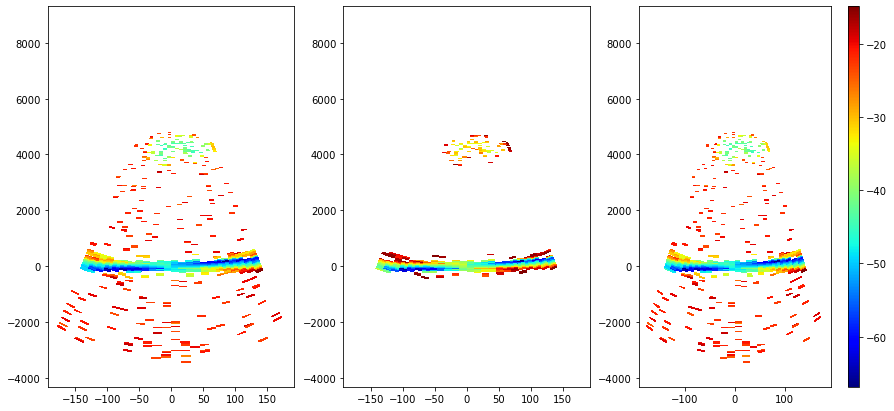

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 7))
# fig , ax2 = plt.subplots(figsize=(5, 7))
x = case.range * np.sin(np.deg2rad(case.azimuth[:, 0]))
y = case.alt3D[:, :, 0] * np.cos(np.deg2rad(case.azimuth[:, 0]))
im2 = ax1.pcolormesh(x, y, case.ldrhh14[:, :, 0], cmap='jet')
im1 = ax2.pcolormesh(x, y, np.ma.masked_where(case.ldrhh14[:, :, 0] > -30, case.ldrhh14[:, :, 0]),
                     cmap='jet')
im3 = ax3.pcolormesh(x, y, case.ldrhh14[:, :, 0], cmap='jet')
plt.colorbar(im3, ax=ax3, orientation='vertical', aspect=35,  pad=0.07)


In [8]:
events = []
for date in ds_xr.time[:2]:
    try: 
        masked_data =  ds_xr.sel(time=date).where((ds_xr.zhh14.sel(time=date) < 60) & 
                                             (ds_xr.vel14.sel(time=date) < 0))
        tex = texture(masked_data.zhh14.values)
        indicators = (tex > 0).astype(int)
        print(indicators.max(), indicators.min())
        _sum = np.sum(indicators)
        if _sum > 40:
            events.append(date)
    except ValueError:
        continue

NameError: name 'masked_data' is not defined